In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.ticker as ticker

# importing sales data
file_path='toy_sales_data.xlsx'

data_df = pd.read_excel(file_path, sheet_name='data')
planned_spend_df = pd.read_excel(file_path, sheet_name='planned_spend')

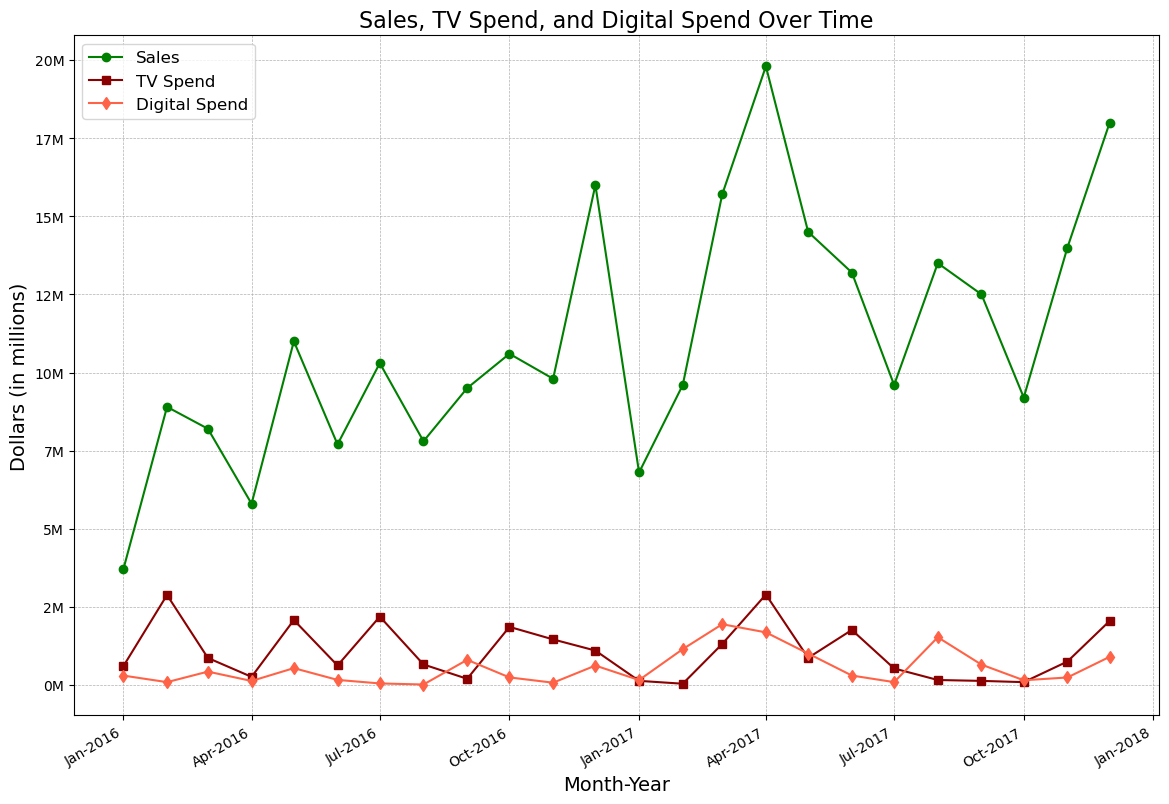

In [2]:
# creating plots 

data_df['month'] = pd.to_datetime(data_df['month'])
planned_spend_df['month'] = pd.to_datetime(planned_spend_df['month'])

plt.figure(figsize=(14, 10))

plt.plot(data_df['month'], data_df['sales'], label='Sales', color='green', marker='o')
plt.plot(data_df['month'], data_df['tv_spend'], label='TV Spend', color='darkred',  marker='s')
plt.plot(data_df['month'], data_df['digital_spend'], label='Digital Spend', color='tomato', marker='d')

plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Dollars (in millions)', fontsize=14)
plt.title('Sales, TV Spend, and Digital Spend Over Time', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# enhancing date format of x axis 
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000000)}M'))

plt.show()

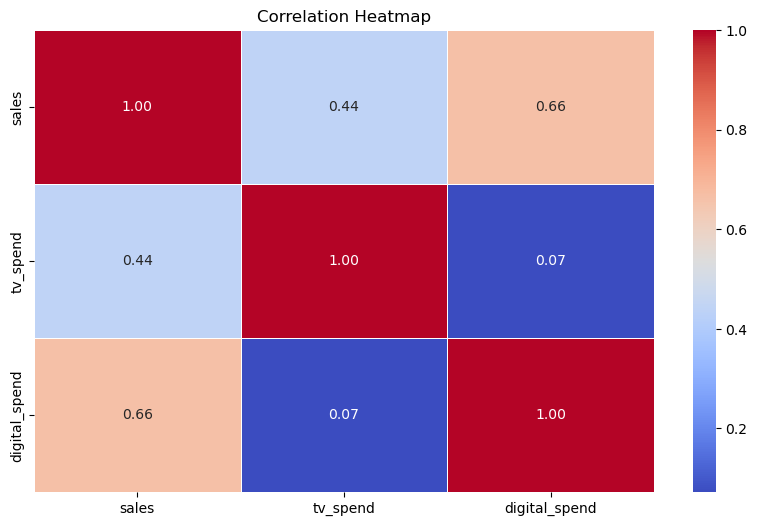

                  sales  tv_spend  digital_spend
sales          1.000000  0.440686       0.664765
tv_spend       0.440686  1.000000       0.072059
digital_spend  0.664765  0.072059       1.000000


In [3]:
# checking correlations

correlations = data_df[['sales', 'tv_spend', 'digital_spend']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print(correlations)

In [4]:
X = data_df[['tv_spend', 'digital_spend']]
X = sm.add_constant(X)  
y = data_df['sales']

# using OLS from statsmodel for regression, due to easily available stats reports
model = sm.OLS(y, X).fit()
 
adjusted_r_squared = model.rsquared_adj
p_values = model.pvalues

print(f"Adjusted R-squared: {adjusted_r_squared}")
print("\nP-values:")
print(p_values)

Adjusted R-squared: 0.558616056482552

P-values:
const            6.717198e-07
tv_spend         9.746777e-03
digital_spend    1.619200e-04
dtype: float64


In [5]:
# Calculating contribution from TV Spend to sales
tv_contribution_percentage = (model.params['tv_spend'] * data_df['tv_spend'].sum()) / data_df['sales'].sum() * 100
tv_contribution_dollars = model.params['tv_spend'] * data_df['tv_spend'].sum()

# calculating TV ROI
tv_roi = tv_contribution_dollars / data_df['tv_spend'].sum()

print(f"TV Contribution to Sales: {round(tv_contribution_percentage,2)}%")
print(f"TV Contribution to Sales (absolute): ${tv_contribution_dollars:,.0f}")
print(f"TV ROI: {round(tv_roi,2)}")


TV Contribution to Sales: 16.6%
TV Contribution to Sales (absolute): $44,108,224
TV ROI: 1.73


In [6]:
# planned spend data for prediction
X_planned = planned_spend_df[['tv_spend', 'digital_spend']]
# adding a constant term for the intercept
X_planned = sm.add_constant(X_planned)  

# predicting sales for first 3 months of 2018 
predicted_sales = model.predict(X_planned)

print("Predicted Sales for the first three months of 2018:")

for i, sales in enumerate(predicted_sales, 1):
    print(f"Month {i}: ${sales:,.0f}")

Predicted Sales for the first three months of 2018:
Month 1: $8,334,056
Month 2: $9,082,486
Month 3: $10,892,394
